中债指数ak接口
https://akshare.akfamily.xyz/data/bond/bond.html#id45


In [1]:
import akshare as ak
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import talib as ta
from matplotlib.font_manager import FontProperties
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
# 添加字体
# matplotlib.rcParams['axes.unicode_minus']=False # 如果不加入下面这一句，会导致负号无法显示
# plt.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
# 下载数据
#df = ak.bond_new_composite_index_cbond(indicator="财富", period="总值")
#df.to_csv('bond_index.csv')
#print(df)

df_bond_index = pd.read_csv('bond_index.csv')
df_bond_index['date'] = pd.to_datetime(df_bond_index.date, format='%Y-%m-%d')

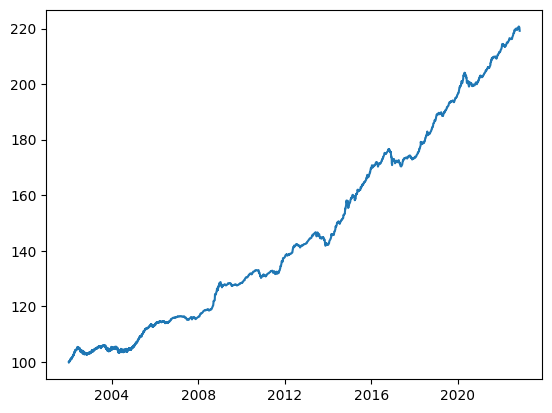

In [3]:
plt.plot(df_bond_index.date,df_bond_index.value)

国债收益率
https://akshare.akfamily.xyz/data/bond/bond.html#id37

In [17]:

# bond_rate_df = ak.bond_zh_us_rate()
# bond_rate_df.to_csv('bond_rate.csv')
# print(bond_rate_df)

df_bond_rate = pd.read_csv('bond_rate.csv')
df_bond_rate['日期'] = pd.to_datetime(df_bond_rate['日期'], format='%Y-%m-%d')
df_bond_rate[~df_bond_rate['中国国债收益率10年'].isna()].count()

Unnamed: 0       5212
日期               5212
中国国债收益率2年        5212
中国国债收益率5年        5212
中国国债收益率10年       5212
中国国债收益率30年       5212
中国国债收益率10年-2年    5212
中国GDP年增率           18
美国国债收益率2年        4844
美国国债收益率5年        4844
美国国债收益率10年       4847
美国国债收益率30年       3917
美国国债收益率10年-2年    4844
美国GDP年增率           15
dtype: int64

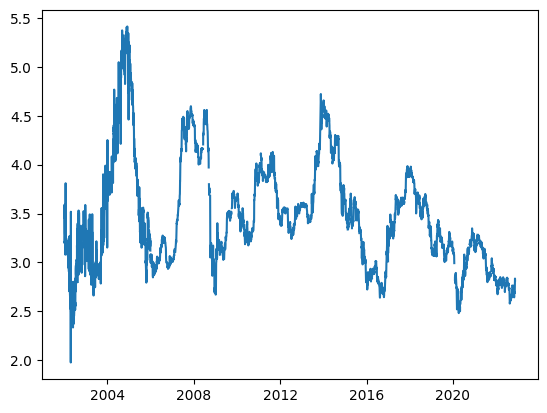

In [5]:
plt.plot(df_bond_rate['日期'],df_bond_rate['中国国债收益率10年'])

合成到一起

5221 8320 4234


Text(0, 0.5, '10y rate')

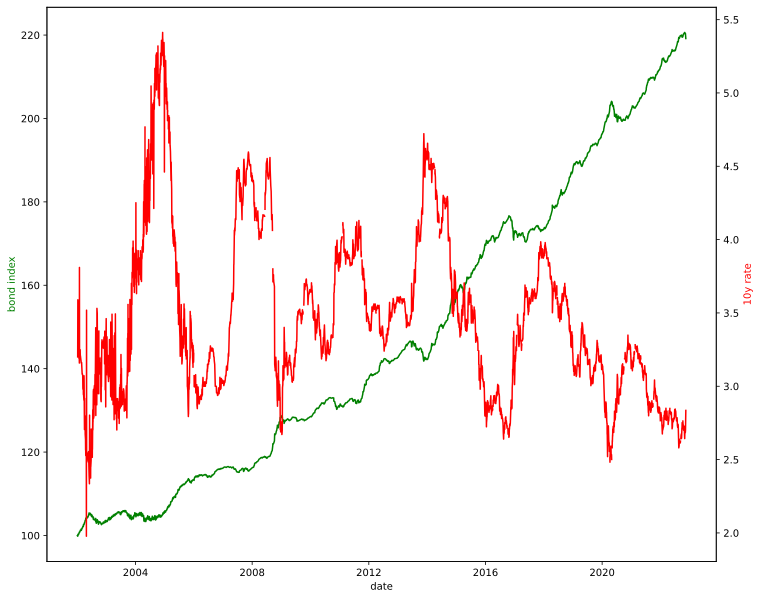

In [66]:
df1 = df_bond_index[['date','value']]
df2 = df_bond_rate[['日期','中国国债收益率10年']]
df = pd.merge(df1,df2,how='inner',left_on='date',right_on='日期')
print(len(df1),len(df2),len(df))

# df = df[df.date>'2020-01-01']

x = df.date
y1 = df['value']
y2 = df['中国国债收益率10年']


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


fig = plt.figure(figsize=(12,10))#,dpi=(100))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'r-')

plt.xticks(rotation=120)

ax1.set_xlabel('date')    #设置x轴标题
ax1.set_ylabel('bond index',color = 'g')   #设置Y1轴标题
ax2.set_ylabel('10y rate',color = 'r')   #设置Y2轴标题
# plt.savefig("result.png") #, dpi=500, bbox_inches='tight')

考察相关性：
在统计学中，皮尔逊积矩相关系数（英语：Pearson product-moment correlation coefficient，又称作 PPMCC或PCCs, 用r表示）用于度量两个变量X和Y之间的相关（线性相关），其值介于-1与1之间。
通常情况下通过以下相关系数取值范围判断变量的相关强度：
    0.8-1.0     极强相关
    0.6-0.8     强相关
    0.4-0.6     中等程度相关
    0.2-0.4     弱相关
    0.0-0.2     极弱相关或无相关
这个相关系数也称作“皮尔森相关系数r”。
(1)皮尔逊系数的定义：
两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商

In [58]:
print(len(df))
df.isna().count()

4234


date          4234
value         4234
日期            4234
中国国债收益率10年    4234
dtype: int64

In [62]:
df[['value','中国国债收益率10年']].corr()

,value,中国国债收益率10年
value,1.000000,-0.403004
中国国债收益率10年,-0.403004,1.000000
